<div style="text-align: left;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Lecci&oacute;n 13 Miércoles 03 de Junio</span></strong></h1>

# Transformada Discreta de Fourier en 2D (DFT-2D)

## Resultado: (Teorema de convolución):

* Sea $g(x,y)$ una imagen obtenida por la convolución de la imagen $f(x,y)$ con un operador $h(x,y)$, es decir,

$$g(x,y) = f(x,y) \ast h(x,y)$$

* Entonces se obtiene que 

$$G(u,v) = F(u,v) \cdot H(u,v)$$

donde $G, F, H$ son las DFT-2D de $g, f, h$ respectivamente

### Representación gráfica de filtros

#### Opción 1:

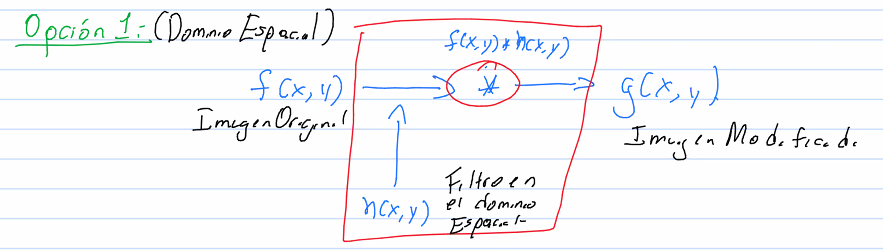

#### Opción 2:

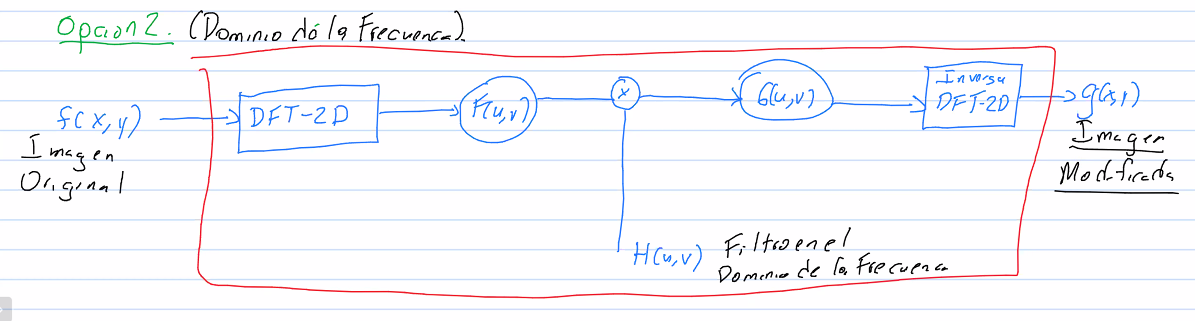

# Filtros en el dominio de la frecuencia

## Filtros paso bajo:

### 1. Filtro ideal:

$$H_{I}(u, v) = \left\{\begin{matrix}
1 & si & D(u, v) \leq D_{0}\\ 
0 & si & D(u, v) > D_{0}
\end{matrix}\right.$$

donde $D(u,v) = \sqrt{u^2 = v^2}$, y $D_{0}$ es un valor no negativo, refiere al corte de la frecuencia.

* **NOTA:** asumimos, en este caso, que $H_{0,0}$ está ubicado en el centro.

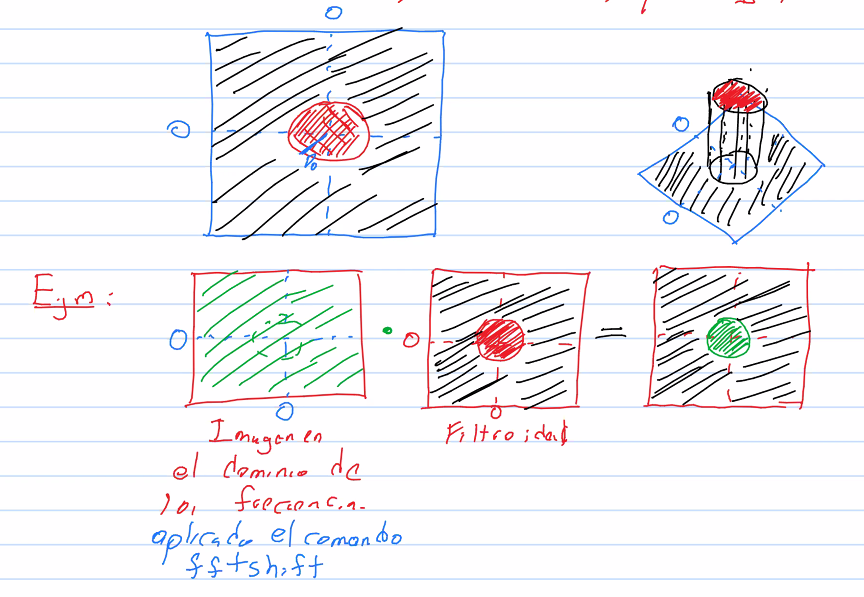

* ¿Qué pasa si no uso el comando fftshift?

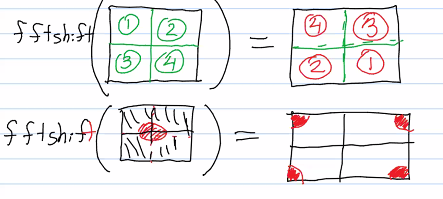

1. $A \rightarrow F\rightarrow \overline{F} \rightarrow * \rightarrow $ ffshift $\rightarrow \overline{\overline{F}} \rightarrow \overline{A} $



2. $A \rightarrow F\rightarrow * \rightarrow \overline{F} \rightarrow \overline{A}$

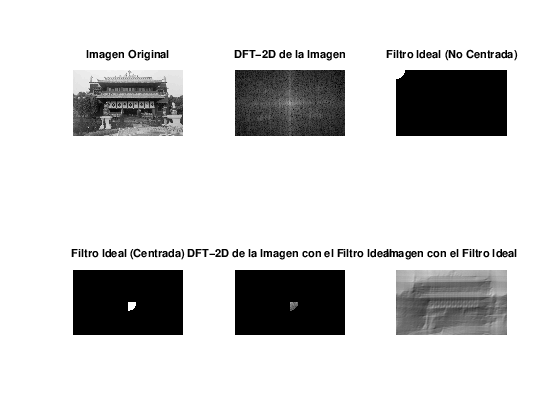

In [3]:
clc; clear;

pkg load image

X = imread('files/edificio_china.jpg');

subplot(2, 3, 1);
imshow(X);
title('Imagen Original');

X = im2double(X);

% Calcular DTF-2D de la imagen
F = fft2(X);
F_shift = fftshift(F);
subplot(2, 3, 2);
imshow(log(1 + abs(F_shift)), []);
title('DFT-2D de la Imagen');

% Calcular el filtro Ideal en el Dominio de la Frecuencia
%% 1: Calcular la matriz de distancia
[m, n] = size(X);
dist = zeros(m, n);

for i = 1 : m
  for j = 1 : n
    dist(i, j) = sqrt(i ^ 2 + j ^ 2);
  endfor
endfor

%% 2: Obtener el Filtro Ideal
H = zeros(m, n);
D0 = 50;
ind = (dist <= D0);
H(ind) = 1; % El 1 se puede cambiar por otro numero en otros filtros

%% Este filtro H, solo tiene una cuarta parte del total
%% Tarea: Completar el filtro H, de tal manera, que en centro se vea un circulo
%H = completeCircle(H); 
subplot(2, 3, 3);
imshow(H);
title('Filtro Ideal (No Centrada)');

subplot(2, 3, 4);
imshow(fftshift(H));
title('Filtro Ideal (Centrada)');

%% 3: Aplicar el filtro
DFT2_filt = F .* H;
FM_shift = fftshift(DFT2_filt);

subplot(2,  3, 5);
imshow(log(1 + abs(FM_shift)), []);
title('DFT-2D de la Imagen con el Filtro Ideal');

% Imagen Filtrada
I_new = real(ifft2(DFT2_filt));
subplot(2, 3, 6);
imshow(I_new);
title('Imagen con el Filtro Ideal');

### 2. Filtro Gaussiano

$$H_{G}(u, v) = e^{-\frac{D(u, v)^{2}}{2\sigma ^{2}}}$$

donde $\sigma > 0$, es un parámetro de corte.

### 3. Filtro Butterworth

$$H_{B}(u, v) = \frac{1}{1 + (\frac{D_{0}}{D(u, v)})^{-2n}}$$

donde $D_{0}$ es la frecuencia de corte y $n$ es el orden.

## Filtro Paso - Alto

### 1. Filtro Ideal

$$H_{I}(u, v) = \left\{\begin{matrix}
0 & si & D(u, v) \leq D_{0}\\ 
1 & si & D(u, v) > D_{0}
\end{matrix}\right.$$

### 2. Filtro Gaussiano

<p>$$H_{G}(u, v) = 1 + e^{-\frac{D(u, v)^{2}}{2\sigma ^{2}}}$$</p>

donde $\sigma > 0$ es el parámetro de corte.

### 3. Filtro Butterworth

<p>$$H_{B}(u, v) = \frac{1}{1 + (\frac{D_{0}}{D(u, v)})^{2n}}$$</p>